<a href="https://colab.research.google.com/github/kendraveren/linear_regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple Linear Regression / Kendra Veren Widya A / DS0213

Multiple Linear Regression atau Analisis Regresi Linear Berganda merupakan analisis statistik yang digunakan untuk melihat pengaruh dari beberapa variabel bebas terhadap variabel terikat. Semakin banyak faktor yang mempengaruhi sebuah regresi, maka semakin baik pula sebuah model dalam melakukan prediksi. Berikut merupakan persamaan dari analisis regresi linear berganda :

y = a + b1x1 + b2x2 + …… + bnxn

dimana :

y = variabel terikat / variabel yang akan diteliti

a = konstanta

x1 ... xn = variabel bebas

b1 ... bn = koefisien variabel bebas

Berikut ini contoh analisis regresi linear berganda yakni pengaruh dan hubungan harga dan pemasangan iklan (variabel bebas) terhadap penjualan pie (variabel terikat).

In [12]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [24]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/kendraveren/linear_regression/main/data/pie-sales.csv', sep =";")
df

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


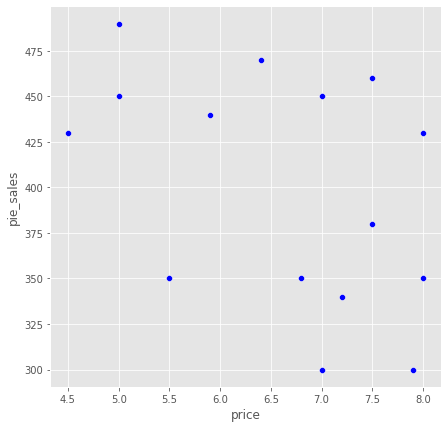

In [25]:
# Visualize the data using scatterplot
sns.scatterplot(x="price", y="pie_sales", data= df, color = 'blue')

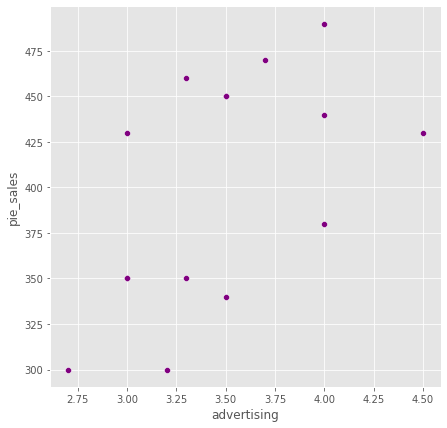

In [26]:
# Visualize the data using scatterplot
sns.scatterplot(x="advertising", y="pie_sales", data= df, color = 'purple')

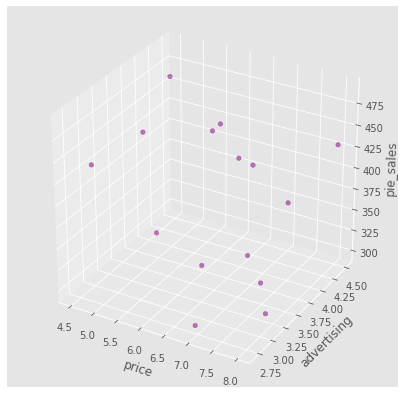

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['price'],df['advertising'],df['pie_sales'],c='purple', marker='o', alpha=0.5)
ax.set_xlabel('price')
ax.set_ylabel('advertising')
ax.set_zlabel('pie_sales')
plt.show()

In [29]:
X = df[['price','advertising']]
Y = df['pie_sales']

In [30]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


Pada persamaan analisis regresi linear berganda 
y = a + b1x1 + b2x2 + …… + bnxn, nilai intercept merupakan konstanta dan nilai coefficient merupakan nilai koefisien dari masing - masing variabel bebas

y = 306.5261932837436 + (-24.97508952(x1)) + 74.13095749(x2)

artinya:



*   Jika nilai x1 dan x2 0, maka nilai y = 306.5261932837436 ; jika nilai 


>x1 dan x2 = 1 maka nilai y sebagai berikut


>y = 306.5261932837436 + (-24.97508952(1)) + 74.13095749(1)

>y = 355.6820612537436

>Begitu seterusnya

*   Koefisien variabel price (X1) sebesar -24.97508952; artinya jika variabel advertising nilainya tetap dan price mengalami kenaikan 1%, maka pie sales (y) akan mengalami penurunan sebesar -24.97508952. Koefisien bernilai negatif artinya terjadi hubungan negatif antara price dengan pie sales, semakin naik price maka semakin turun pie sales.

*   Koefisien variabel advertising (X2) sebesar 74.13095749; artinya jika variabel price nilainya tetap dan advertising mengalami kenaikan 1%, maka pie sales (y) akan mengalami peningkatan sebesar 74.13095749. Koefisien bernilai positif artinya terjadi hubungan positif antara advertising dengan pie sales, semakin naik advertising maka semakin meningkat pie sales.






In [33]:
# Visualizing Linear Regression 3D
x_s, y_s = np.meshgrid(np.linspace(df.price.min(), df.price.max()),np.linspace(df.advertising.min(), df.advertising.max()))
onlyX = pd.DataFrame({'price': x_s.ravel(), 'advertising': y_s.ravel()})
fittedY=regr.predict(onlyX)
fittedY=np.array(fittedY)

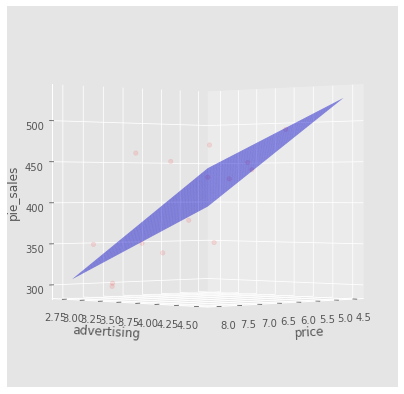

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['price'],df['advertising'],df['pie_sales'],c='red', marker='o', alpha=0.10)
ax.plot_surface(x_s,y_s,fittedY.reshape(x_s.shape), color='b', alpha=0.5)
ax.set_xlabel('price')
ax.set_ylabel('advertising')
ax.set_zlabel('pie_sales')
ax.view_init(0, 45) 
plt.show()

In [37]:
# prediction with sklearn
new_price = 6.9
new_advertising = 4.7
print ('Predicted  Pie_sales: \n', regr.predict([[new_price,new_advertising]]))

Predicted  Pie_sales: 
 [482.61357581]


In [38]:
X = sm.add_constant(X) # adding a constant

In [39]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        13:11:41   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      



1. Uji Parsial

> Uji parsial digunakan untuk menguji parameter secara parsial dengan kata lain untuk mengetahui apakah variable bebas (X) berpengaruh secara signifikan (nyata) terhadap variable terikat (Y). Dari gambar didapat p-value konstanta sebesar 0.020, nilai price (x1) sebesar 0.040 dan nilai advertising (x2) sebesar 0.014.
Berikut hipotesisnya:
- Hipotesis
       
       H0 : βi = 0, (Tidak terdapat pengaruh secara signifikan antara X dengan Y)
       H1 : βi ≠ 0, (Terdapat pengaruh secara signifikan antara X dengan Y)
- Tingkat signifikasi
          
          ∝=5% = 0.05
- Daerah kritis
        
        Jika p-value ≤ ∝ (0.05) → Tolak H0
- Statistik uji
         P-value :  = 0.020 dan  = 0.040 ; ∝= 0,05

> Karena nilai p-value untuk β1 dan β2 <  ∝ maka tolak, Kesimpulannya, dengan tingkat kepercayaan 95% terdapat pengaruh secara signifikan antara variable price (x1) dan variabel advertising (x2) dengan variabel pie sales (y).

2. Uji Normalitas

> Uji Normalitaas adalah untuk melihat apakah nilai residual terdistribusi normal atau tidak. Model regresi yang baik adalah memiliki nilai residual yang terdistribusi normal. Disini kita menggunakan nilai prob Jaque Bera (JB) dari gambar output diatas sebesar 0.626. Dengan hipotesis sebagai berikut:
- Menentukan Hipotesis

        H0 : Residual berdistribusi normal
        H1 : Residual tidak Berdistribusi Normal
- Tingkat signifikansi
         
      ∝ = 5% (∝ = 0.05)
- Statistik Uji
        
         p-value =  0.626
- Daerah kritis
      
       Tolak H0 jika p-value < α

> Keputusan
Karena nilai p-value sama dengan 0.626, dimana nilai p-value > α yaitu 0.626 > 0,05 maka gagal tolak H0. Jadi, dengan tingkat kepercayaan 95% dapat disimpulkan bahwa residual berdistribusi normal.

3. Uji Autokorelasi

> Dianalisis autokorelasi ini jadi tidak boleh ada korelasi (non-autokorelasi) antara observasi dengan data observasi sebelumnya. Dapat dilihat dari gambar output diatas bahwa uji autokorelasi menggunakan output DW(Durbin-Watson) sebesar 1.683. 
    
- Menentukan Hipotesis
    
     H0 : Tidak terdapat Autokorelasi

     H1 : terdapat Autokorelasi
    
- Tingkat signifikansi
    
      ∝=5 (∝=0,05)
- Menentukan daerah kritis
     
      Tolak H0 : jika 0 < DW < dl  atau 4 – dl < DW < 4
      
      Gagal tolak H0 : jika du < DW <4 – du
      
      Tidak ada keputusan : jika dl < DW < du atau 4 – du < DW < 4 – dl

> Karena nilai DW  1.683 dengan du < DW <4 – du atau 0.9820 < DW <4 – 1.5386 maka interval daerah keputusannya yaitu  0.9820 < 1.683 < 2.4614 sehingga dapat dikatakan bahwa Tolak H0. Jadi, dengan tingkat signifikansi 5% dapat disimpulkan bahwa keputusan uji adalah tidak terdapat Autokorelasi.

4. Analisis Determinasi (R-square)

> Analisis determinasi pada regresi linear berganda berguna untuk mengetahui persentase sumbangan pengaruh variabel - variabel bebas secara bersama - sama terhadap variabel terikat. Jika nilai R-square 0 maka tidak ada persentase sumbangan pengaruh dari variabel bebas terhadap variabel terikat, begiru pula sebaliknya. Dari hasil di atas dapat dilihat bahwa hasil R-squarenya adalah 0,521 atau dengan kata lain persentase sumbangan pengaruh variabel bebas terhadap variabel terikatnya sebesar 52,1% dan sisanya dipengaruhi oleh variabel lain yang tidak ada dalam model regresi ini.

5. Uji F

> Uji ini dilakukan untuk mengetahui apakah variabel bebas secara bersama - sama berpengaruh signifikan terhadap variabel terikatnya. Uji ini juga dapat digunakan untuk mengetahui apakah model regresi dapat digunakan untuk memperkirakan variabel terikat atau tidak. Tahap dalam melakukan uji F adalah sebagai berikut :

- Merumuskan Hipotesis

      Ho : Tidak ada pengaruh secara signifikan antara price dan advertising secara bersama-sama terhadap pie sales.

      Ha : Ada pengaruh secara signifikan antara price dan advertising secara bersama-sama terhadap pie sales.
- Menentukan tingkat signifikansi

      Tingkat signifikansi menggunakan a = 5% (signifikansi 5% atau 0,05 adalah ukuran standar yang sering digunakan dalam penelitian)
- Menentukan F hitung

      Berdasarkan tabel  diperoleh F hitung sebesar 6.539
- Menentukan F tabel
      Dengan menggunakan tingkat keyakinan 95%, a = 5%, df 1 (jumlah variabel–1)  = 2, dan df 2 (n-k-1) atau 15-2-1  = 12 (n adalah jumlah kasus dan k adalah jumlah variabel independen), hasil diperoleh untuk F tabel sebesar 3.885 (dicari di Ms Excel).
- Kriteria pengujian
      Ho diterima bila F hitung < F tabel
      Ho ditolak bila F hitung > F tabel
- Membandingkan F hitung dengan F tabel.
      Nilai F hitung > F tabel (6.539 > 3,885), maka Ho ditolak.
> Karena F hitung > F tabel (6.539 > 3.885), maka Ho ditolak, artinya ada pengaruh secara signifikan antara  price dan advertising secara bersama-sama terhadap terhadap pie sales. Jadi dari kasus ini dapat disimpulkan bahwa price dan advertising secara bersama-sama berpengaruh terhadap pie sales.

5. Uji t

> Uji ini dilakukan untuk mengetahui apakah dalam model regresi variabel bebas secara parsial berpengaruh signifikan terhadap variabel terikat. Tahap - tahap pengujian uji t sebagai berikut :

**Pengujian Koefisien Regresi Variabel Price**
- Menentukan Hipotesis
      Ho : Secara parsial tidak ada pengaruh signifikan antara price dengan pie sales
      Ha : Secara parsial ada pengaruh signifikan antara price dengan pie sales
- Menentukan tingkat signifikansi
      Tingkat signifikansi menggunakan a = 5%
- Menentukan t hitung
      Berdasarkan hasil tabel diperoleh t hitung sebesar -2.306
- Menentukan t tabel
      Tabel distribusi t dicari pada a = 5% : 2 = 2.5% (uji 2 sisi) dengan derajat kebebasan (df) n-k-1 atau  15-2-1  = 12 (n adalah jumlah kasus dan k adalah jumlah variabel independen). Dengan pengujian 2 sisi (signifikansi = 0.025) hasil diperoleh untuk t tabel sebesar -2.1788 dicari di Ms Excel
- Kriteria Pengujian
      Ho diterima jika -t tabel < t hitung < t tabel
      Ho ditolak jika -t hitung < -t tabel atau t hitung > t tabel
- Membandingkan thitung dengan t tabel
      Nilai -t hitung < -t tabel (-2.306 < -2.1788) maka Ho ditolak
> Kesimpulannya, karena nilai -t hitung < -t tabel (-2.306 < -2.1788) maka Ho diterima, artinya secara parsial ada pengaruh signifikan antara price dengan pie sales. Jadi dari kasus ini dapat disimpulkan bahwa secara parsial price berpengaruh positif terhadap pie sales.

**Pengujian Koefisien regresi Variabel Advertising**
- Menentukan Hipotesis
      Ho : Secara parsial tidak ada pengaruh signifikan antara advertising dengan pie sales
      Ha : Secara parsial ada pengaruh signifikan antara advertising dengan pie sales
- Menentukan tingkat signifikansi
      Tingkat signifikansi menggunakan a = 5%.
- Menentukan t hitung
      Berdasarkan tabel  diperoleh t hitung sebesar 2.855
- Menentukan t tabel
      Tabel distribusi t dicari pada a = 5% : 2 = 2.5% (uji 2 sisi) dengan derajat kebebasan (df) n-k-1 atau  15-2-1  = 12 (n adalah jumlah kasus dan k adalah jumlah variabel independen). Dengan pengujian 2 sisi (signifikansi = 0.025) hasil diperoleh untuk t tabel sebesar 2.1788.
- Kriteria Pengujian
      Ho diterima jika -t tabel £ t hitung £ t tabel
      Ho ditolak jika -t hitung < -t tabel atau t hitung > t tabel
- Membandingkan thitung dengan t tabel
      Nilai t hitung > t tabel (2.855 > 2.1788) maka Ho ditolak
> Kesimpulan, karena nilai t hitung > t tabel (2.855 > 2.1788) maka Ho ditolak, artinya secara parsial ada pengaruh signifikan antara advertising dengan pie sales. Jadi dari kasus ini dapat disimpulkan bahwa secara parsial advertising berpengaruh positif terhadap pie sales.


